In [1]:
print("hello world")

hello world


In [56]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions


In [13]:
df=pd.read_csv("placement-data.csv")
df.sample(10)

,Unnamed: 0.1,Unnamed: 0,cgpa,iq,placement
88,88,88,4.4,149.0,0
99,99,99,6.2,113.0,1
2,2,2,5.3,121.0,0
81,81,81,5.4,107.0,0
45,45,45,6.0,66.0,1
84,84,84,5.7,169.0,0
5,5,5,7.1,48.0,1
40,40,40,4.9,134.0,0
70,70,70,6.3,127.0,1
50,50,50,3.5,233.0,0


In [ ]:
#data preprocessing removing the use less columns 
df=df.loc[:,["cgpa","iq","placement"]]
df.sample(10)

,cgpa,iq,placement
51,4.8,141.0,0
91,7.5,158.0,1
72,7.3,116.0,1
9,5.1,66.0,0
0,6.8,123.0,1
80,4.9,196.0,0
62,6.0,102.0,0
10,6.0,45.0,1
84,5.7,169.0,0
47,5.2,161.0,0


In [19]:
df.shape

(100, 3)

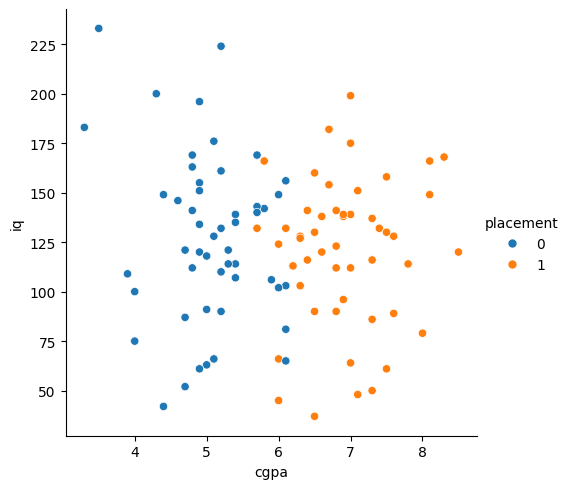

In [ ]:
#eda

sns.relplot(data=df,y="iq",x="cgpa",hue="placement",kind="scatter")

In [31]:
# seperating input and output columns
x=df.iloc[:,:2]
y=df.iloc[:,2]
# x.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [36]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [38]:
x_test

,cgpa,iq
33,6.0,149.0
37,8.1,149.0
52,7.0,175.0
4,5.8,142.0
38,6.5,160.0
9,5.1,66.0
11,6.9,138.0
92,5.2,110.0
51,4.8,141.0
43,6.8,141.0


### value scaling

In [41]:
scaler =StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

array([[-0.2306098 ,  1.15772688],
       [ 0.89831685,  1.89792641],
       [-1.70689851, -1.16156496],
       [-0.57797185, -0.19930558],
       [ 1.15883839, -0.14995894],
       [ 0.11675224,  0.24481414],
       [ 0.72463583,  0.02275428],
       [ 0.89831685, -1.43297145],
       [-0.66481236,  0.24481414],
       [ 0.29043327,  0.14612087],
       [-0.9253339 ,  1.82390645],
       [-0.75165288,  1.33044011],
       [-0.83849339, -0.10061231],
       [ 1.85356248,  1.08370693],
       [ 0.46411429, -0.79146519],
       [-0.2306098 ,  0.24481414],
       [-1.01217441,  1.15772688],
       [ 0.29043327, -0.47071207],
       [ 1.41935992, -0.81613851],
       [ 0.02991173, -1.90176448],
       [-1.09901492, -0.86548515],
       [ 0.81147634,  0.41752736],
       [-1.09901492, -0.02659235],
       [-0.57797185, -0.02659235],
       [-1.01217441,  1.00968698],
       [-0.49113134, -0.19930558],
       [-0.9253339 ,  0.71360717],
       [-0.9253339 ,  0.81230044],
       [ 0.20359276,

In [46]:
x_test = scaler.transform(x_test)
x_test


/Users/keshavmacbook/Projects/AI-ML/AI-ML basic/.aiml-venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[  6. , 149. ],
       [  8.1, 149. ],
       [  7. , 175. ],
       [  5.8, 142. ],
       [  6.5, 160. ],
       [  5.1,  66. ],
       [  6.9, 138. ],
       [  5.2, 110. ],
       [  4.8, 141. ],
       [  6.8, 141. ]])

### training the model

In [49]:
clf= LogisticRegression()

In [51]:
clf.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### evaluate the model

In [54]:
y_predict=clf.predict(x_test)

In [55]:
accuracy_score(y_test,y_predict)

0.5

/Users/keshavmacbook/Projects/AI-ML/AI-ML basic/.aiml-venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/keshavmacbook/Projects/AI-ML/AI-ML basic/.aiml-venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/keshavmacbook/Projects/AI-ML/AI-ML basic/.aiml-venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


<Axes: >

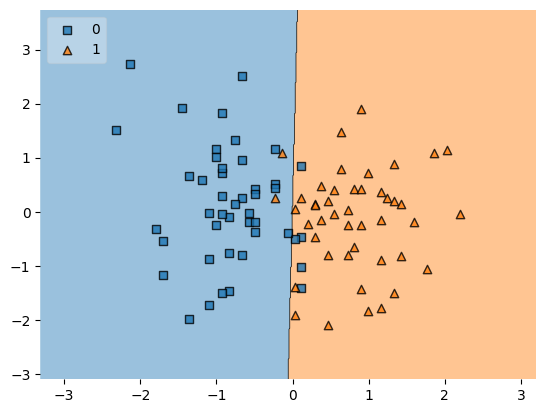

In [59]:
plot_decision_regions(x_train,y_train.values,clf=clf ,legend=2)